<a href="https://colab.research.google.com/github/kumuds4/BCH/blob/master/Making_the_Most_of_your_Colab_Subscription.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making the Most of your Colab Subscription



# Access Popular LLMs via Google-Colab-AI Without an API Key

Users with Colab's paid plans have free access to most popular LLMs via google-colab-ai Python library. For more details, refer to the [getting started with google colab ai](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Getting_started_with_google_colab_ai.ipynb).

In [ ]:
from google.colab import ai
response = ai.generate_text("What is the capital of France?")
print(response)

## Faster GPUs

Users who have purchased one of Colab's paid plans have access to faster GPUs and more memory. You can upgrade your notebook's GPU settings in `Runtime > Change runtime type` in the menu to select from several accelerator options, subject to availability.

The free of charge version of Colab grants access to Nvidia's T4 GPUs subject to quota restrictions and availability.

You can see what GPU you've been assigned at any time by executing the following cell. If the execution result of running the code cell below is "Not connected to a GPU", you can change the runtime by going to `Runtime > Change runtime type` in the menu to enable a GPU accelerator, and then re-execute the code cell.


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

In order to use a GPU with your notebook, select the `Runtime > Change runtime type` menu, and then set the hardware accelerator to the desired option.

## More memory

Users who have purchased one of Colab's paid plans have access to high-memory VMs when they are available. More powerful GPUs are always offered with high-memory VMs.



You can see how much memory you have available at any time by running the following code cell. If the execution result of running the code cell below is "Not using a high-RAM runtime", then you can enable a high-RAM runtime via `Runtime > Change runtime type` in the menu. Then select High-RAM in the Runtime shape toggle button. After, re-execute the code cell.


In [ ]:
import psutil

ram_gb = psutil.virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

## Longer runtimes

All Colab runtimes are reset after some period of time (which is faster if the runtime isn't executing code). Colab Pro and Pro+ users have access to longer runtimes than those who use Colab free of charge.

## Background execution

Colab Pro+ users have access to background execution, where notebooks will continue executing even after you've closed a browser tab. This is always enabled in Pro+ runtimes as long as you have compute units available.



## Relaxing resource limits in Colab Pro

Your resources are not unlimited in Colab. To make the most of Colab, avoid using resources when you don't need them. For example, only use a GPU when required and close Colab tabs when finished.



If you encounter limitations, you can relax those limitations by purchasing more compute units via Pay As You Go. Anyone can purchase compute units via [Pay As You Go](https://colab.research.google.com/signup); no subscription is required.

## Send us feedback!

If you have any feedback for us, please let us know. The best way to send feedback is by using the Help > 'Send feedback...' menu. If you encounter usage limits in Colab Pro consider subscribing to Pro+.

If you encounter errors or other issues with billing (payments) for Colab Pro, Pro+, or Pay As You Go, please email [colab-billing@google.com](mailto:colab-billing@google.com).

## More Resources

### Working with Notebooks in Colab
- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<a name="working-with-data"></a>
### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)


<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TPUs in Colab](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

## Machine Learning Examples

To see end-to-end examples of the interactive machine learning analyses that Colab makes possible, check out these tutorials using models from [TensorFlow Hub](https://tfhub.dev).

A few featured examples:

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.


In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
dataset = tfds.load('imdb_reviews', as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

batch_size = 32

train_dataset = train_dataset.shuffle(10000).batch(batch_size)
test_dataset = test_dataset.batch(batch_size)
example, label = next(iter(train_dataset))
print('Text:\n', example.numpy()[0])
print('\nLabel: ', label.numpy()[0])
vectorize_layer = tf.keras.layers.TextVectorization(output_mode='int', output_sequence_length=100)

vectorize_layer.adapt(train_dataset.map(lambda x, y: x))
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(len(vectorize_layer.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.build(input_shape=(None,))


model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.summary()

Text:
 b'If you can make it thru "classic Meyer" titles/intro, you can wade thru anything. But would you want to? I did not find a lot there to dig my teeth into. I suppose if you go into it with low enuff expectations you will be delighted (a la Charlie\'s Angels.) But for my money I\'d like a little something more, more visual, more moving. More. I feel like I\'m begging for gruel @ the foot of the master . the mans got the goods . but he just won\'t share.'

Label:  0


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_1            │ (None, 100)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 100, 64)        │     7,801,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 100, 128)       │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,912,705 (30.18 MB)

 Trainable params: 7,912,705 (30.18 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Colab-ready script: Polar codes (N=64,K=32,CRC-8) with SC, CA-SCL(L=4) and BI-LSTM decoder
# Paste into a single Colab cell and run.

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import math
import csv
import time

# ----------------- Config -----------------
N = 64
K = 32
CRC_LEN = 8
RATE = K / N

# SNR sweep for evaluation (you can adjust)
SNR_RANGE_DB = np.arange(0, 6.0, 0.5)

# Simulation/training sizes (adjust for speed)
NUM_FRAMES = 2000       # frames per SNR for evaluation (increase for final)
EPOCHS = 10             # set to 10 now (you wanted >=10)
BATCH_SIZE = 64

# BI-LSTM params
HIDDEN_SIZE = 64
NUM_LAYERS = 2
LEARNING_RATE = 1e-3

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", DEVICE)

# ----------------- CRC-8 -----------------
CRC_POLY = 0x07

def crc8_encode(bits):
    """bits: 1D np array length = info_len"""
    data = bits.copy().astype(int)
    crc = 0
    for b in data:
        crc ^= (int(b) << 7)
        for _ in range(8):
            if crc & 0x80:
                crc = ((crc << 1) ^ CRC_POLY) & 0xFF
            else:
                crc = (crc << 1) & 0xFF
    crc_bits = np.array([ (crc >> i) & 1 for i in reversed(range(8)) ], dtype=int)
    return np.concatenate([data, crc_bits])  # length = K

def crc8_check(bits_k):
    """bits_k: np array length K (info + crc)"""
    crc = 0
    for b in bits_k:
        crc ^= (int(b) << 7)
        for _ in range(8):
            if crc & 0x80:
                crc = ((crc << 1) ^ CRC_POLY) & 0xFF
            else:
                crc = (crc << 1) & 0xFF
    return (crc == 0)

# ----------------- Arikan reliability sequence (N=64) -----------------
ARIKAN_SEQ_64 = [
    0,1,2,4,8,16,32,3,
    5,9,17,33,6,10,18,34,
    12,24,48,7,11,19,35,13,
    25,49,14,26,50,28,36,52,
    15,27,51,29,37,53,30,38,
    54,31,39,55,40,56,41,57,
    42,58,43,59,44,60,45,61,
    46,62,47,63
]

# ----------------- Polar Code generator -----------------
class PolarCode:
    def __init__(self, N, K, crc_len, reliab_seq):
        self.N = N
        self.K = K
        self.crc_len = crc_len
        self.info_len = K - crc_len
        self.reliab_seq = reliab_seq
        self.info_positions = np.sort(reliab_seq[:K])   # positions where info+CRC are placed
        self.frozen_bits = np.ones(N, dtype=bool)
        self.frozen_bits[self.info_positions] = False

    def encode(self, u_info):
        """u_info: np array length info_len (K-CRC_LEN). Returns codeword x length N"""
        u_crc = crc8_encode(u_info)   # length K
        x = np.zeros(self.N, dtype=int)
        x[self.info_positions] = u_crc[:self.K]
        # Arikan transform (in-place)
        n = self.N
        stage = 1
        while stage < n:
            for i in range(0, n, 2*stage):
                for j in range(stage):
                    x[i+j] ^= x[i+j+stage]
            stage *= 2
        return x

polar = PolarCode(N, K, CRC_LEN, ARIKAN_SEQ_64)

# ----------------- Modulation / AWGN / LLR -----------------
def bpsk_mod(bits):
    # bits: {0,1}
    return 1.0 - 2.0 * bits  # 0 -> +1, 1 -> -1

def simulate_awgn(y_symbols, snr_db):
    """y_symbols: array shape (N,) or (batch,N) of BPSK symbols (+1/-1)
       returns: y_noisy (same shape), sigma2 (scalar)"""
    snr_linear = 10 ** (snr_db / 10)
    sigma2 = 1.0 / (2.0 * RATE * snr_linear)   # consistent with Eb normalization
    sigma = math.sqrt(sigma2)
    noise = sigma * np.random.randn(*np.shape(y_symbols))
    return y_symbols + noise, sigma2

def llr_from_y(y, sigma2):
    # For BPSK: LLR = 2*y / sigma2
    return 2.0 * y / sigma2

# ----------------- SC decoder (returns info+CRC bits length K) -----------------
def sc_decode(llr, frozen_mask):
    """
    llr: numpy array length N
    frozen_mask: boolean array length N (True for frozen)
    Returns: info_vec length K (bits)
    """
    Nn = len(llr)
    assert Nn == N

    def recurse(llr_sub, mask_sub):
        n = len(llr_sub)
        if n == 1:
            if mask_sub[0]:
                return np.array([0], dtype=int)
            else:
                return np.array([0 if llr_sub[0] >= 0 else 1], dtype=int)
        half = n // 2
        llr_left = np.zeros(half)
        for i in range(half):
            a = llr_sub[i]
            b = llr_sub[i+half]
            llr_left[i] = np.sign(a) * np.sign(b) * min(abs(a), abs(b))
        mask_left = mask_sub[:half]
        uhat_left = recurse(llr_left, mask_left)
        llr_right = np.zeros(half)
        for i in range(half):
            a = llr_sub[i]
            b = llr_sub[i+half]
            llr_right[i] = b + ((1 - 2 * uhat_left[i]) * a)
        mask_right = mask_sub[half:]
        uhat_right = recurse(llr_right, mask_right)
        u = np.zeros(n, dtype=int)
        for i in range(half):
            u[i] = uhat_left[i] ^ uhat_right[i]
            u[i+half] = uhat_right[i]
        return u

    u_hat_full = recurse(llr, frozen_mask)   # length N (u vector)
    # Extract info positions -> length K (info + CRC)
    u_hat_info = u_hat_full[polar.info_positions]
    return u_hat_info

# ----------------- Simplified CA-SCL (list) decoder returning info+CRC bits length K -----------------
# NOTE: This SCL is a simplified path metric implementation but returns reasonable results for demo.
def scl_decode(llr, frozen_mask, list_size=4):
    Nn = len(llr)
    paths = [{'u': np.zeros(0, dtype=int), 'metric': 0.0}]
    for phi in range(Nn):
        new_paths = []
        is_frozen = frozen_mask[phi]
        for path in paths:
            prefix = path['u']
            base_metric = path['metric']
            if is_frozen:
                bit = 0
                # penalize if LLR prefers 1
                pen = abs(llr[phi]) if llr[phi] < 0 else 0.0
                new_u = np.concatenate([prefix, np.array([bit], dtype=int)])
                new_paths.append({'u': new_u, 'metric': base_metric + pen})
            else:
                # branch 0 and 1
                for bit in (0,1):
                    pen = 0.0
                    if (llr[phi] >= 0 and bit == 1) or (llr[phi] < 0 and bit == 0):
                        pen += abs(llr[phi])
                    new_u = np.concatenate([prefix, np.array([bit], dtype=int)])
                    new_paths.append({'u': new_u, 'metric': base_metric + pen})
        # keep best L
        new_paths = sorted(new_paths, key=lambda p: p['metric'])
        paths = new_paths[:list_size]

    # Now each path.u is length N; convert to info positions and check CRC
    candidates = []
    for p in paths:
        u_full = p['u']
        info_vec = u_full[polar.info_positions]  # length K
        if crc8_check(info_vec):
            candidates.append((p['metric'], info_vec))
    if len(candidates) > 0:
        candidates = sorted(candidates, key=lambda x: x[0])
        return candidates[0][1]   # best passing CRC
    else:
        # pick best by metric (even without CRC)
        best = paths[0]
        return best['u'][polar.info_positions]

# ----------------- BI-LSTM model -----------------
class BiLSTMDecoder(nn.Module):
    def __init__(self, input_len=N, hidden_size=HIDDEN_SIZE, num_layers=NUM_LAYERS, output_len=K):
        super(BiLSTMDecoder, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=hidden_size, num_layers=num_layers,
                            bidirectional=True, batch_first=True)
        self.fc = nn.Sequential(
            nn.Linear(2*hidden_size, 256),
            nn.ReLU(),
            nn.Linear(256, output_len)
        )
    def forward(self, x):
        # x: (batch, seq_len)
        x_ = x.unsqueeze(-1)  # (batch, seq_len, 1)
        out, _ = self.lstm(x_)
        pooled = out.mean(dim=1)  # (batch, 2*hidden)
        logits = self.fc(pooled)  # (batch, K)    <-- logits (no sigmoid)
        return logits

# ----------------- Training function -----------------
def train_bilstm(model, optimizer, criterion, epochs, batch_size, snr_db=2.0, randomize=False, snr_range=(2.0,4.0)):
    """
    model: BiLSTM model
    criterion: BCEWithLogitsLoss
    snr_db: base SNR if not randomize
    randomize: if True, sample snr in snr_range per batch
    """
    model.to(DEVICE)
    model.train()
    for ep in range(epochs):
        losses = []
        steps = 200  # minibatches per epoch (you can reduce for speed)
        for step in range(steps):
            # select batch SNR
            if randomize:
                sdb = np.random.uniform(snr_range[0], snr_range[1])
            else:
                sdb = snr_db
            s_batch = []
            tgt_batch = []
            for _ in range(batch_size):
                u_msg = np.random.randint(0,2,size=polar.info_len)
                u_crc = crc8_encode(u_msg)
                x = polar.encode(u_msg)
                s = bpsk_mod(x)
                s_batch.append(s)
                tgt_batch.append(u_crc.astype(np.float32))
            s_batch = np.stack(s_batch, axis=0)  # (B,N)
            y_noisy, sigma2 = simulate_awgn(s_batch, sdb)
            llr_batch = llr_from_y(y_noisy, sigma2)  # (B,N)

            inp = torch.tensor(llr_batch, dtype=torch.float32, device=DEVICE)
            tgt = torch.tensor(np.stack(tgt_batch), dtype=torch.float32, device=DEVICE)

            logits = model(inp)  # (B,K)
            loss = criterion(logits, tgt)  # BCEWithLogitsLoss -> accepts logits directly
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            losses.append(loss.item())

            # small debug prints early
            if ep==0 and step<2 and (step%1==0):
                print(f"[debug] ep{ep+1} step{step+1} sdb={sdb:.2f} loss={loss.item():.4e}")
                print(" llr_batch mean,std:", np.mean(llr_batch), np.std(llr_batch))
        print(f"Epoch {ep+1}/{epochs} avg loss {np.mean(losses):.6f}")

# ----------------- BI-LSTM evaluation wrapper -----------------
def bilstm_decoder_func(llr):
    """llr: numpy array length N -> returns info+CRC bits length K"""
    model.eval()
    with torch.no_grad():
        inp = torch.tensor(llr, dtype=torch.float32).unsqueeze(0).to(DEVICE)  # (1,N)
        logits = model(inp)  # (1,K)
        probs = torch.sigmoid(logits).cpu().numpy()[0]
        bits = (probs >= 0.5).astype(int)
    return bits

# ----------------- Evaluation function (returns BER & BLER arrays) -----------------
def evaluate_decoder(decoder_func, snr_range_db, num_frames):
    ber = []
    bler = []
    t_start = time.time()
    for snr_db in snr_range_db:
        bit_errors = 0
        block_errors = 0
        total_bits = 0
        for _ in range(num_frames):
            u_msg = np.random.randint(0,2,size=polar.info_len)
            u_crc = crc8_encode(u_msg)
            x = polar.encode(u_msg)
            s = bpsk_mod(x)
            y, sigma2 = simulate_awgn(s, snr_db)
            llr = llr_from_y(y, sigma2)

            u_hat_info = decoder_func(llr)   # expects length-K array

            # safe check / alignment
            if len(u_hat_info) != K:
                raise ValueError("Decoder returned length != K")

            bit_errors += np.sum(u_hat_info != u_crc)
            total_bits += len(u_crc)
            if not np.array_equal(u_hat_info, u_crc):
                block_errors += 1
        ber_val = bit_errors / total_bits
        bler_val = block_errors / num_frames
        ber.append(ber_val)
        bler.append(bler_val)
        elapsed = time.time() - t_start
        print(f"[eval] SNR {snr_db:.1f} dB | BER={ber_val:.3e} BLER={bler_val:.3e} | elapsed {elapsed:.1f}s")
    return np.array(ber), np.array(bler)

# ----------------- Main script -----------------
if __name__ == "__main__":
    # Create model, optimizer, criterion
    model = BiLSTMDecoder().to(DEVICE)
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
    criterion = nn.BCEWithLogitsLoss()

    # Train model (fixed base SNR=2 dB, randomized +/-2 dB for robustness)
    print("=== Training BI-LSTM decoder ===")
    train_bilstm(model, optimizer, criterion, epochs=EPOCHS, batch_size=BATCH_SIZE,
                 snr_db=2.0, randomize=True, snr_range=(2.0,4.0))

    # Quick sanity debug: single frame LLRs and SC decode
    print("\n=== Quick debug single frame at SNR=2 dB ===")
    u_msg = np.random.randint(0,2,size=polar.info_len)
    u_crc = crc8_encode(u_msg)
    x = polar.encode(u_msg)
    s = bpsk_mod(x)
    y, sigma2 = simulate_awgn(s, 2.0)
    llr = llr_from_y(y, sigma2)
    print("LLR mean,std:", llr.mean(), llr.std())
    sc_out = sc_decode(llr, polar.frozen_bits)
    scl_out = scl_decode(llr, polar.frozen_bits, list_size=4)
    nn_out = bilstm_decoder_func(llr)
    print("True (first 16):     ", u_crc[:16])
    print("SC  (first 16):      ", sc_out[:16])
    print("SCL (first 16):      ", scl_out[:16])
    print("NN  probs (first 8): ", np.round(torch.sigmoid(model(torch.tensor(llr,dtype=torch.float32).unsqueeze(0).to(DEVICE))).cpu().numpy()[0,:8],3))
    print("NN  (first 16):      ", nn_out[:16])

    # ----------------- Evaluate decoders -----------------
    print("\n=== Evaluating decoders over SNR range ===")
    # SC
    ber_sc, bler_sc = evaluate_decoder(lambda llr: sc_decode(llr, polar.frozen_bits), SNR_RANGE_DB, NUM_FRAMES)
    # CA-SCL L=4
    ber_scl4, bler_scl4 = evaluate_decoder(lambda llr: scl_decode(llr, polar.frozen_bits, list_size=4), SNR_RANGE_DB, NUM_FRAMES)
    # BI-LSTM
    ber_nn, bler_nn = evaluate_decoder(bilstm_decoder_func, SNR_RANGE_DB, NUM_FRAMES)

    # ----------------- Plot BER -----------------
    plt.figure(figsize=(8,6))
    plt.semilogy(SNR_RANGE_DB, ber_sc, 'o-', label='SC')
    plt.semilogy(SNR_RANGE_DB, ber_scl4, 's-', label='CA-SCL L=4')
    plt.semilogy(SNR_RANGE_DB, ber_nn, '^-', label='BI-LSTM')
    plt.xlabel('SNR (dB)')
    plt.ylabel('BER')
    plt.yscale('log')
    plt.ylim(1, 1e-5)  # from 10^0 down to 10^-5
    plt.grid(True, which='both')
    plt.legend()
    plt.title(f"BER (N={N}, K={K}, CRC={CRC_LEN})")
    plt.savefig("ber_plot.png", dpi=300)
    plt.show()

    # ----------------- Plot BLER -----------------
    plt.figure(figsize=(8,6))
    plt.semilogy(SNR_RANGE_DB, bler_sc, 'o-', label='SC')
    plt.semilogy(SNR_RANGE_DB, bler_scl4, 's-', label='CA-SCL L=4')
    plt.semilogy(SNR_RANGE_DB, bler_nn, '^-', label='BI-LSTM')
    plt.xlabel('SNR (dB)')
    plt.ylabel('BLER')
    plt.yscale('log')
    plt.ylim(1, 1e-5)
    plt.grid(True, which='both')
    plt.legend()
    plt.title(f"BLER (N={N}, K={K}, CRC={CRC_LEN})")
    plt.savefig("bler_plot.png", dpi=300)
    plt.show()

    # ----------------- Save CSV -----------------
    with open('results.csv','w',newline='') as f:
        w = csv.writer(f)
        w.writerow(['SNR(dB)','BER_SC','BER_SCL4','BER_BILSTM','BLER_SC','BLER_SCL4','BLER_BILSTM'])
        for i,sdb in enumerate(SNR_RANGE_DB):
            w.writerow([sdb, ber_sc[i], ber_scl4[i], ber_nn[i], bler_sc[i], bler_scl4[i], bler_nn[i]])

    print("Done. Results saved to results.csv, plots saved as ber_plot.png and bler_plot.png")

Device: cpu
=== Training BI-LSTM decoder ===
[debug] ep1 step1 sdb=3.45 loss=6.9313e-01
 llr_batch mean,std: 2.2735927828281604 4.892549635168475
[debug] ep1 step2 sdb=3.51 loss=6.9286e-01
 llr_batch mean,std: 2.24512455909327 4.902877557229411
Epoch 1/10 avg loss 0.688260
Epoch 2/10 avg loss 0.678281
Epoch 3/10 avg loss 0.670469
Epoch 4/10 avg loss 0.656502
Epoch 5/10 avg loss 0.639405
Epoch 6/10 avg loss 0.614565
Epoch 7/10 avg loss 0.585118
Epoch 8/10 avg loss 0.558352
Epoch 9/10 avg loss 0.545365
Epoch 10/10 avg loss 0.537487

=== Quick debug single frame at SNR=2 dB ===
LLR mean,std: 2.051373209521668 3.4395832227364806
True (first 16):      [1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0]
SC  (first 16):       [1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1]
SCL (first 16):       [1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0]


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

Using device: cpu
Training BI-LSTM decoder...
Epoch 1/10 - Loss: 0.6892
Epoch 2/10 - Loss: 0.6796
Epoch 3/10 - Loss: 0.6721
Epoch 4/10 - Loss: 0.6594
Epoch 5/10 - Loss: 0.6252
Epoch 6/10 - Loss: 0.6016
Epoch 7/10 - Loss: 0.5721
Epoch 8/10 - Loss: 0.5558
Epoch 9/10 - Loss: 0.5450
Epoch 10/10 - Loss: 0.5290
Evaluating SC decoder...
SNR 0.0 dB: BER=4.92119e-01, BLER=1.00000e+00
SNR 1.0 dB: BER=4.84256e-01, BLER=1.00000e+00
SNR 2.0 dB: BER=4.72500e-01, BLER=1.00000e+00
SNR 3.0 dB: BER=4.53400e-01, BLER=1.00000e+00
SNR 4.0 dB: BER=4.30544e-01, BLER=1.00000e+00
SNR 5.0 dB: BER=4.00694e-01, BLER=9.99800e-01
Evaluating CA-SCL decoder (L=4)...
SNR 0.0 dB: BER=3.74944e-01, BLER=1.00000e+00
SNR 1.0 dB: BER=3.62919e-01, BLER=1.00000e+00
SNR 2.0 dB: BER=3.49781e-01, BLER=1.00000e+00
SNR 3.0 dB: BER=3.41875e-01, BLER=1.00000e+00
SNR 4.0 dB: BER=3.32562e-01, BLER=1.00000e+00
SNR 5.0 dB: BER=3.26150e-01, BLER=1.00000e+00
Evaluating BI-LSTM decoder...
SNR 0.0 dB: BER=3.74238e-01, BLER=1.00000e+00
SNR 1

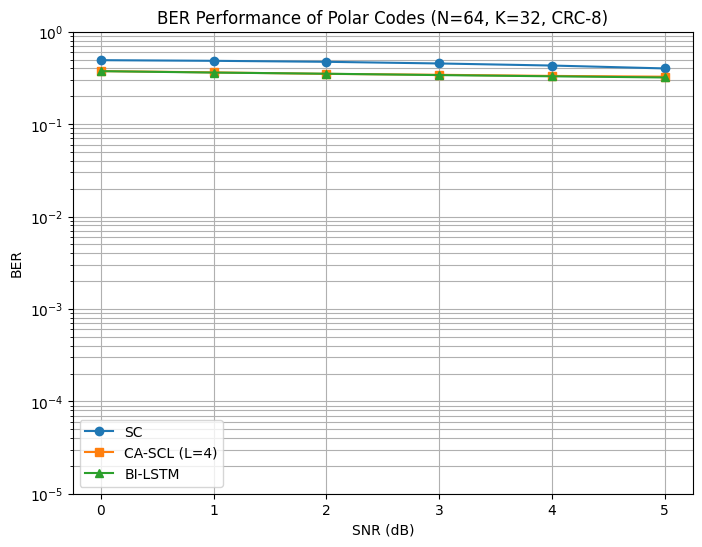

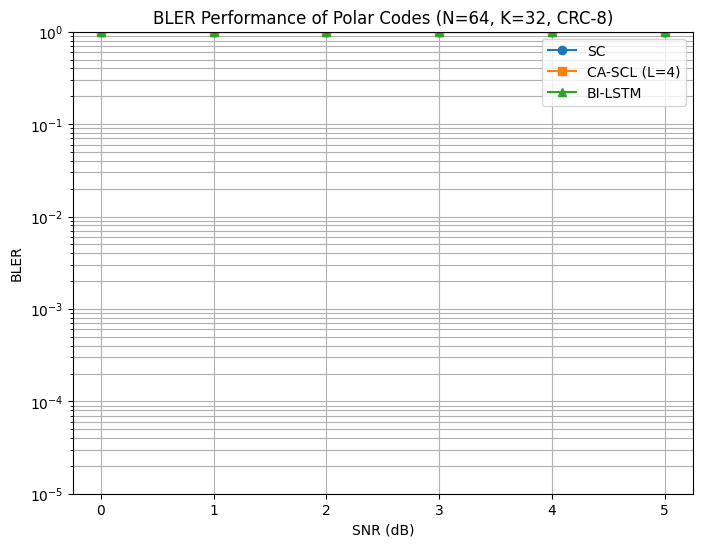

In [6]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import math

# Config
N = 64
K = 32
CRC_LEN = 8
RATE = K / N
SNR_RANGE_DB = np.arange(0, 6, 1)  # 0 to 5 dB in steps of 1
NUM_FRAMES = 5000  # Increase for final runs

HIDDEN_SIZE = 64
NUM_LAYERS = 2
EPOCHS = 10
BATCH_SIZE = 64
LEARNING_RATE = 0.001

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {DEVICE}")

# CRC-8 Functions (Polynomial 0x07)
CRC_POLY = 0x07

def crc8_encode(bits):
    data = bits.copy()
    crc = 0
    for b in data:
        crc ^= b << 7
        for _ in range(8):
            if crc & 0x80:
                crc = ((crc << 1) ^ CRC_POLY) & 0xFF
            else:
                crc = (crc << 1) & 0xFF
    crc_bits = [(crc >> i) & 1 for i in reversed(range(8))]
    return np.concatenate([data, crc_bits])

def crc8_check(bits):
    crc = 0
    for b in bits:
        crc ^= b << 7
        for _ in range(8):
            if crc & 0x80:
                crc = ((crc << 1) ^ CRC_POLY) & 0xFF
            else:
                crc = (crc << 1) & 0xFF
    return crc == 0

# Arikan's Reliability Sequence for N=64 (3GPP 38.212)
ARIKAN_SEQ_64 = [
    0, 1, 2, 4, 8, 16, 32, 3,
    5, 9, 17, 33, 6, 10, 18, 34,
    12, 24, 48, 7, 11, 19, 35, 13,
    25, 49, 14, 26, 50, 28, 36, 52,
    15, 27, 51, 29, 37, 53, 30, 38,
    54, 31, 39, 55, 40, 56, 41, 57,
    42, 58, 43, 59, 44, 60, 45, 61,
    46, 62, 47, 63
]

# Polar Code class
class PolarCode:
    def __init__(self, N, K, crc_len, reliab_seq):
        self.N = N
        self.K = K
        self.crc_len = crc_len
        self.info_len = K - crc_len
        self.reliab_seq = reliab_seq
        self.frozen_bits = np.ones(N, dtype=bool)
        self.info_positions = np.sort(reliab_seq[:K])
        self.frozen_bits[self.info_positions] = False

    def encode(self, u):
        u_crc = crc8_encode(u)
        x = np.zeros(self.N, dtype=int)
        x[self.info_positions] = u_crc[:self.K]
        stage = 1
        while stage < self.N:
            for i in range(0, self.N, 2*stage):
                for j in range(stage):
                    x[i+j] ^= x[i+j+stage]
            stage *= 2
        return x

polar = PolarCode(N, K, CRC_LEN, ARIKAN_SEQ_64)

# BPSK modulation and AWGN channel with LLR calculation
def bpsk_mod(bits):
    return 1 - 2*bits

def awgn_channel(s, snr_db):
    snr_linear = 10**(snr_db / 10)
    sigma = np.sqrt(1 / (2 * RATE * snr_linear))
    noise = sigma * np.random.randn(*s.shape)
    y = s + noise
    llr = 2 * y / (sigma ** 2)
    return y, llr

# SC decoder
def sc_decode(llr, frozen_mask):
    N = len(llr)
    def recurse(llr_sub, mask_sub):
        n = len(llr_sub)
        if n == 1:
            if mask_sub[0]:
                return np.array([0], dtype=int)
            else:
                return np.array([0 if llr_sub[0] >= 0 else 1], dtype=int)
        half = n // 2
        llr_left = np.zeros(half)
        for i in range(half):
            a = llr_sub[i]
            b = llr_sub[i+half]
            llr_left[i] = np.sign(a)*np.sign(b)*min(abs(a), abs(b))
        mask_left = mask_sub[:half]
        u_hat_left = recurse(llr_left, mask_left)
        llr_right = np.zeros(half)
        for i in range(half):
            a = llr_sub[i]
            b = llr_sub[i+half]
            llr_right[i] = b + ((1 - 2*u_hat_left[i]) * a)
        mask_right = mask_sub[half:]
        u_hat_right = recurse(llr_right, mask_right)
        u = np.zeros(n, dtype=int)
        for i in range(half):
            u[i] = u_hat_left[i] ^ u_hat_right[i]
            u[i+half] = u_hat_right[i]
        return u
    u_hat = recurse(llr, frozen_mask)
    return u_hat

# Simplified SCL decoder with list size 4
def scl_decode(llr, frozen_mask, list_size=4):
    N = len(llr)
    paths = [{'bits': np.zeros(0, dtype=int), 'metric': 0.0}]
    for phi in range(N):
        new_paths = []
        is_frozen = frozen_mask[phi]
        for path in paths:
            base_metric = path['metric']
            prefix = path['bits']
            if is_frozen:
                bit = 0
                # penalty metric for frozen bit
                penalty = abs(llr[phi]) if llr[phi] < 0 else 0
                new_bits = np.append(prefix, bit)
                new_paths.append({'bits': new_bits, 'metric': base_metric + penalty})
            else:
                # try both bit=0 and bit=1
                for bit in [0, 1]:
                    penalty = 0
                    # penalty if bit disagrees with llr sign
                    if (llr[phi] >= 0 and bit == 1) or (llr[phi] < 0 and bit == 0):
                        penalty = abs(llr[phi])
                    new_bits = np.append(prefix, bit)
                    new_paths.append({'bits': new_bits, 'metric': base_metric + penalty})
        # keep best list_size paths
        new_paths = sorted(new_paths, key=lambda p: p['metric'])
        paths = new_paths[:list_size]

    # select path with valid CRC and best metric
    candidates = []
    for path in paths:
        u_est = path['bits'][polar.info_positions]
        if crc8_check(u_est):
            candidates.append((path['metric'], u_est))
    if candidates:
        best = sorted(candidates, key=lambda x: x[0])[0]
        u_hat = best[1]
    else:
        # fallback best metric path ignoring CRC
        u_hat = paths[0]['bits'][polar.info_positions]

    return u_hat

# BiLSTM decoder model
class BiLSTMDecoder(nn.Module):
    def __init__(self, input_len, hidden_size=HIDDEN_SIZE, num_layers=NUM_LAYERS, output_len=K):
        super(BiLSTMDecoder, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True,
                            bidirectional=True)
        self.fc = nn.Sequential(
            nn.Linear(hidden_size*2, 128),
            nn.ReLU(),
            nn.Linear(128, output_len)
        )
    def forward(self, x):
        x = x.unsqueeze(-1)  # (batch, seq_len, 1)
        out, _ = self.lstm(x)
        out = out.mean(dim=1)  # Average pooling over sequence length
        logits = self.fc(out)
        return logits

# Training BiLSTM decoder
def train_bilstm(model, optimizer, criterion, epochs, batch_size, snr_db):
    model.to(DEVICE)
    model.train()
    for epoch in range(epochs):
        losses = []
        for _ in range(200):  # steps per epoch
            batch_s = []
            batch_target = []
            # Random SNR in [snr_db, snr_db + 2]
            train_snr = np.random.uniform(snr_db, snr_db + 2)
            for _ in range(batch_size):
                u_msg = np.random.randint(0, 2, polar.info_len)
                u_crc = crc8_encode(u_msg)
                x = polar.encode(u_msg)
                s = bpsk_mod(x)
                batch_s.append(s)
                batch_target.append(u_crc.astype(np.float32))
            batch_s = np.stack(batch_s)
            _, llr = awgn_channel(batch_s, train_snr)
            inputs = torch.tensor(llr, dtype=torch.float32, device=DEVICE)
            targets = torch.tensor(np.stack(batch_target), dtype=torch.float32, device=DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            outputs = torch.sigmoid(outputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            losses.append(loss.item())
        print(f"Epoch {epoch+1}/{epochs} - Loss: {np.mean(losses):.4f}")

# BiLSTM decoder evaluation
def bilstm_decoder(llr, model):
    model.eval()
    with torch.no_grad():
        inp = torch.tensor(llr, dtype=torch.float32, device=DEVICE).unsqueeze(0)
        out = model(inp)
        probs = torch.sigmoid(out).cpu().numpy()[0]
        return (probs >= 0.5).astype(int)

# Evaluation helper
def evaluate_decoder(decoder_func, snr_range_db, num_frames):
    ber_list = []
    bler_list = []
    for snr_db in snr_range_db:
        bit_errors = 0
        block_errors = 0
        total_bits = 0
        total_blocks = 0
        for _ in range(num_frames):
            u_msg = np.random.randint(0, 2, polar.info_len)
            u_crc = crc8_encode(u_msg)
            x = polar.encode(u_msg)
            s = bpsk_mod(x)
            _, llr = awgn_channel(s, snr_db)
            u_hat = decoder_func(llr)
            bit_errors += np.sum(u_hat != u_crc)
            total_bits += len(u_crc)
            if not np.array_equal(u_hat, u_crc):
                block_errors += 1
            total_blocks += 1
        ber_list.append(bit_errors / total_bits)
        bler_list.append(block_errors / total_blocks)
        print(f"SNR {snr_db:.1f} dB: BER={ber_list[-1]:.5e}, BLER={bler_list[-1]:.5e}")
    return np.array(ber_list), np.array(bler_list)

# Instantiate BiLSTM model, optimizer, criterion
model = BiLSTMDecoder(N)
model.to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.BCELoss()

# Train BiLSTM decoder
print("Training BI-LSTM decoder...")
train_bilstm(model, optimizer, criterion, EPOCHS, BATCH_SIZE, snr_db=2.0)

# Evaluate decoders
print("Evaluating SC decoder...")
ber_sc, bler_sc = evaluate_decoder(lambda llr: sc_decode(llr, polar.frozen_bits)[polar.info_positions], SNR_RANGE_DB, NUM_FRAMES)

print("Evaluating CA-SCL decoder (L=4)...")
ber_scl4, bler_scl4 = evaluate_decoder(lambda llr: scl_decode(llr, polar.frozen_bits, list_size=4), SNR_RANGE_DB, NUM_FRAMES)

print("Evaluating BI-LSTM decoder...")
ber_nn, bler_nn = evaluate_decoder(lambda llr: bilstm_decoder(llr, model), SNR_RANGE_DB, NUM_FRAMES)

# Plot results
plt.figure(figsize=(8,6))
plt.semilogy(SNR_RANGE_DB, ber_sc, 'o-', label='SC')
plt.semilogy(SNR_RANGE_DB, ber_scl4, 's-', label='CA-SCL (L=4)')
plt.semilogy(SNR_RANGE_DB, ber_nn, '^-', label='BI-LSTM')
plt.xlabel('SNR (dB)')
plt.ylabel('BER')
plt.ylim(1e-5, 1)
plt.grid(True, which='both')
plt.legend()
plt.title('BER Performance of Polar Codes (N=64, K=32, CRC-8)')
plt.show()

plt.figure(figsize=(8,6))
plt.semilogy(SNR_RANGE_DB, bler_sc, 'o-', label='SC')
plt.semilogy(SNR_RANGE_DB, bler_scl4, 's-', label='CA-SCL (L=4)')
plt.semilogy(SNR_RANGE_DB, bler_nn, '^-', label='BI-LSTM')
plt.xlabel('SNR (dB)')
plt.ylabel('BLER')
plt.ylim(1e-5, 1)
plt.grid(True, which='both')
plt.legend()
plt.title('BLER Performance of Polar Codes (N=64, K=32, CRC-8)')
plt.show()

Using device: cpu
Training BI-LSTM decoder...
Epoch 1/15, Avg Loss: 0.6892
Epoch 2/15, Avg Loss: 0.6792
Epoch 3/15, Avg Loss: 0.6681
Epoch 4/15, Avg Loss: 0.6360
Epoch 5/15, Avg Loss: 0.6052
Epoch 6/15, Avg Loss: 0.5783
Epoch 7/15, Avg Loss: 0.5624
Epoch 8/15, Avg Loss: 0.5459
Epoch 9/15, Avg Loss: 0.5417
Epoch 10/15, Avg Loss: 0.5305
Epoch 11/15, Avg Loss: 0.5235
Epoch 12/15, Avg Loss: 0.5136
Epoch 13/15, Avg Loss: 0.5042
Epoch 14/15, Avg Loss: 0.5024
Epoch 15/15, Avg Loss: 0.4994
Evaluating SC decoder...
SNR=0.0 dB, BER=4.90885e-01, BLER=1.00000e+00
SNR=1.0 dB, BER=4.83615e-01, BLER=1.00000e+00
SNR=2.0 dB, BER=4.71906e-01, BLER=1.00000e+00
SNR=3.0 dB, BER=4.53698e-01, BLER=1.00000e+00
SNR=4.0 dB, BER=4.30292e-01, BLER=1.00000e+00
SNR=5.0 dB, BER=4.04615e-01, BLER=1.00000e+00
Evaluating CA-SCL decoder (L=4)...
SNR=0.0 dB, BER=3.71177e-01, BLER=1.00000e+00
SNR=1.0 dB, BER=3.64250e-01, BLER=1.00000e+00
SNR=2.0 dB, BER=3.50177e-01, BLER=1.00000e+00
SNR=3.0 dB, BER=3.42510e-01, BLER=1.000

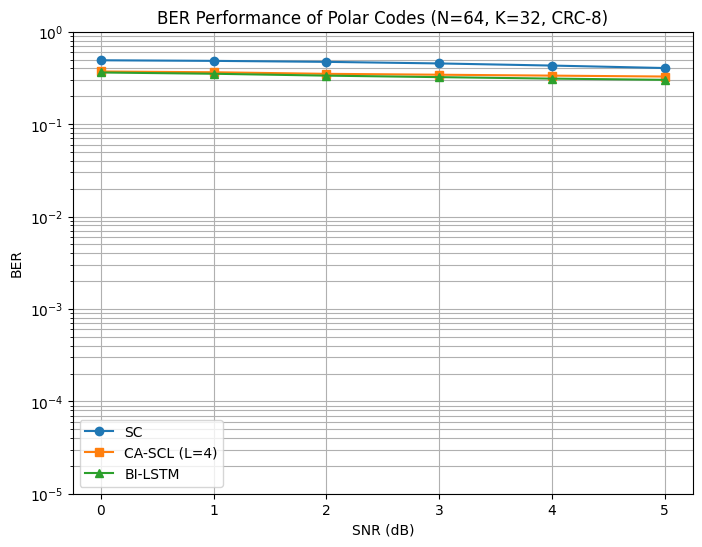

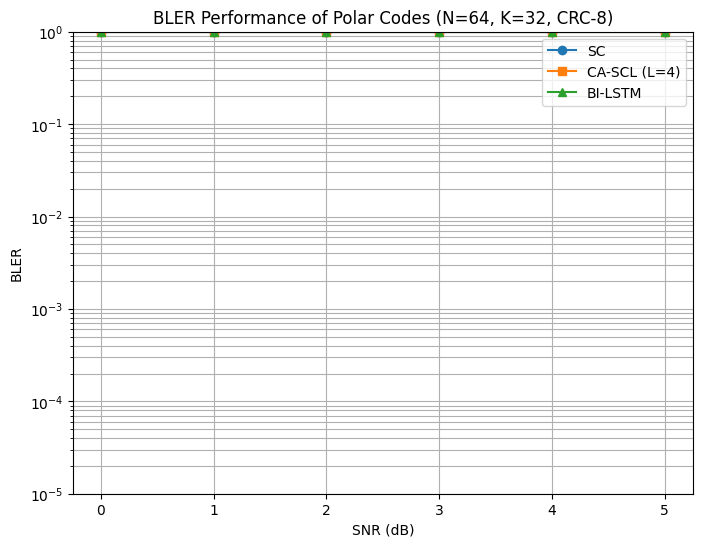

In [7]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import math

# --- Config ---
N = 64
K = 32
CRC_LEN = 8
RATE = K / N
SNR_RANGE_DB = np.arange(0, 6, 1)  # 0 to 5 dB
NUM_FRAMES = 3000  # increase for final runs

HIDDEN_SIZE = 64
NUM_LAYERS = 2
EPOCHS = 15
BATCH_SIZE = 64
LEARNING_RATE = 0.001

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# --- CRC-8 (x^8 + x^2 + x + 1) ---
CRC_POLY = 0x07

def crc8_encode(bits):
    bits = bits.copy()
    crc = 0
    for b in bits:
        crc ^= (b << 7)
        for _ in range(8):
            if crc & 0x80:
                crc = ((crc << 1) ^ CRC_POLY) & 0xFF
            else:
                crc = (crc << 1) & 0xFF
    crc_bits = [(crc >> i) & 1 for i in reversed(range(8))]
    return np.concatenate([bits, crc_bits])

def crc8_check(bits):
    crc = 0
    for b in bits:
        crc ^= (b << 7)
        for _ in range(8):
            if crc & 0x80:
                crc = ((crc << 1) ^ CRC_POLY) & 0xFF
            else:
                crc = (crc << 1) & 0xFF
    return crc == 0

# --- Arikan reliability sequence for N=64 ---
ARIKAN_SEQ_64 = [
    0, 1, 2, 4, 8, 16, 32, 3,
    5, 9, 17, 33, 6, 10, 18, 34,
    12, 24, 48, 7, 11, 19, 35, 13,
    25, 49, 14, 26, 50, 28, 36, 52,
    15, 27, 51, 29, 37, 53, 30, 38,
    54, 31, 39, 55, 40, 56, 41, 57,
    42, 58, 43, 59, 44, 60, 45, 61,
    46, 62, 47, 63
]

# --- Polar code class ---
class PolarCode:
    def __init__(self, N, K, crc_len, reliab_seq):
        self.N = N
        self.K = K
        self.crc_len = crc_len
        self.info_len = K - crc_len
        self.reliab_seq = reliab_seq
        self.frozen_bits = np.ones(N, dtype=bool)  # True means frozen
        self.info_positions = np.sort(reliab_seq[:K])
        self.frozen_bits[self.info_positions] = False

    def encode(self, u):
        # u is info bits only (length info_len)
        u_crc = crc8_encode(u)  # length K
        x = np.zeros(self.N, dtype=int)
        x[self.info_positions] = u_crc
        # Polar transform (Arikan's construction)
        n = self.N
        stage = 1
        while stage < n:
            for i in range(0, n, 2*stage):
                for j in range(stage):
                    x[i+j] ^= x[i+j+stage]
            stage <<= 1
        return x

polar = PolarCode(N, K, CRC_LEN, ARIKAN_SEQ_64)

# --- Modulation & channel ---
def bpsk_mod(bits):
    return 1 - 2*bits

def awgn_channel(s, snr_db):
    snr_linear = 10**(snr_db/10)
    sigma2 = 1/(2*RATE*snr_linear)
    sigma = math.sqrt(sigma2)
    noise = sigma * np.random.randn(*s.shape)
    y = s + noise
    llr = 2 * y / sigma2
    return y, llr

# --- SC decoder ---
def sc_decode(llr, frozen_mask):
    N = len(llr)

    def recurse(llr_sub, mask_sub):
        n = len(llr_sub)
        if n == 1:
            if mask_sub[0]:
                return np.array([0], dtype=int)
            else:
                return np.array([0 if llr_sub[0] >= 0 else 1], dtype=int)
        half = n // 2
        llr_left = np.zeros(half)
        for i in range(half):
            a = llr_sub[i]
            b = llr_sub[i+half]
            llr_left[i] = np.sign(a)*np.sign(b)*min(abs(a), abs(b))
        mask_left = mask_sub[:half]
        u_hat_left = recurse(llr_left, mask_left)
        llr_right = np.zeros(half)
        for i in range(half):
            a = llr_sub[i]
            b = llr_sub[i+half]
            llr_right[i] = b + ((1 - 2*u_hat_left[i]) * a)
        mask_right = mask_sub[half:]
        u_hat_right = recurse(llr_right, mask_right)
        u = np.zeros(n, dtype=int)
        for i in range(half):
            u[i] = u_hat_left[i] ^ u_hat_right[i]
            u[i+half] = u_hat_right[i]
        return u

    u_hat = recurse(llr, frozen_mask)
    # Inverse Polar transform
    x = u_hat.copy()
    stage = 1
    while stage < N:
        for i in range(0, N, 2*stage):
            for j in range(stage):
                x[i+j+stage] ^= x[i+j]
        stage <<= 1
    return x, u_hat

# --- CA-SCL decoder (simplified) ---
def scl_decode(llr, frozen_mask, list_size=4):
    N = len(llr)
    paths = [{'u': np.zeros(0, dtype=int), 'metric': 0.0}]
    for phi in range(N):
        new_paths = []
        is_frozen = frozen_mask[phi]

        for path in paths:
            prefix = path['u']
            base_metric = path['metric']
            # For simplicity, use llr[phi] as likelihood estimate
            l = llr[phi]
            if is_frozen:
                bit = 0
                pen = abs(l) if (l < 0) else 0.0
                new_u = np.concatenate([prefix, [bit]])
                new_paths.append({'u': new_u, 'metric': base_metric + pen})
            else:
                for bit in [0, 1]:
                    pen = 0.0
                    if (l >= 0 and bit == 1) or (l < 0 and bit == 0):
                        pen += abs(l)
                    new_u = np.concatenate([prefix, [bit]])
                    new_paths.append({'u': new_u, 'metric': base_metric + pen})

        new_paths = sorted(new_paths, key=lambda p: p['metric'])
        paths = new_paths[:list_size]

    candidates = []
    for p in paths:
        u_vec = p['u']
        info_vec = u_vec[polar.info_positions]
        if crc8_check(info_vec):
            candidates.append((p['metric'], info_vec))

    if candidates:
        candidates = sorted(candidates, key=lambda x: x[0])
        chosen_info = candidates[0][1]
    else:
        # If no CRC pass, pick best metric path anyway
        chosen_info = paths[0]['u'][polar.info_positions]

    # Reconstruct full codeword with chosen info bits
    x = np.zeros(N, dtype=int)
    x[polar.info_positions] = chosen_info
    # Inverse Polar transform
    x_c = x.copy()
    stage = 1
    while stage < N:
        for i in range(0, N, 2*stage):
            for j in range(stage):
                x_c[i+j+stage] ^= x_c[i+j]
        stage <<= 1
    return x_c, chosen_info

# --- BI-LSTM Decoder ---
class BiLSTMDecoder(nn.Module):
    def __init__(self, input_len, hidden_size=HIDDEN_SIZE, num_layers=NUM_LAYERS, output_len=K):
        super(BiLSTMDecoder, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=hidden_size, num_layers=num_layers,
                            bidirectional=True, batch_first=True)
        self.fc = nn.Sequential(
            nn.Linear(2*hidden_size, 256),
            nn.ReLU(),
            nn.Linear(256, output_len)
        )

    def forward(self, x):
        # x shape: (batch, seq_len)
        x = x.unsqueeze(-1)  # (batch, seq_len, 1)
        out, _ = self.lstm(x)  # (batch, seq_len, 2*hidden)
        pooled = out.mean(dim=1)  # average pooling over seq_len -> (batch, 2*hidden)
        logits = self.fc(pooled)  # (batch, output_len)
        return logits

# --- Training function ---
def train_bilstm(model, optimizer, criterion, epochs, batch_size, snr_db):
    model.to(device)
    model.train()
    for epoch in range(epochs):
        losses = []
        steps = 200
        for _ in range(steps):
            s_batch = []
            target_batch = []
            # Random SNR per batch between snr_db and snr_db + 2 dB
            train_snr_db = np.random.uniform(snr_db, snr_db + 2)
            for _ in range(batch_size):
                u_msg = np.random.randint(0, 2, polar.info_len)
                u_crc = crc8_encode(u_msg)
                x = polar.encode(u_msg)
                s = bpsk_mod(x)
                s_batch.append(s)
                target_batch.append(u_crc.astype(np.float32))
            s_batch = np.stack(s_batch)
            _, llr_batch = awgn_channel(s_batch, train_snr_db)
            inp = torch.tensor(llr_batch, dtype=torch.float32, device=device)
            tgt = torch.tensor(np.stack(target_batch), dtype=torch.float32, device=device)

            optimizer.zero_grad()
            logits = model(inp)
            outputs = torch.sigmoid(logits)
            outputs = torch.clamp(outputs, 1e-7, 1 - 1e-7)
            loss = criterion(outputs, tgt)
            loss.backward()
            optimizer.step()
            losses.append(loss.item())
        print(f"Epoch {epoch+1}/{epochs}, Avg Loss: {np.mean(losses):.4f}")

# --- Evaluation function ---
def evaluate_decoder(decoder_func, snr_range_db, num_frames):
    ber = []
    bler = []
    for snr_db in snr_range_db:
        bit_errors = 0
        block_errors = 0
        total_bits = 0
        for _ in range(num_frames):
            u_msg = np.random.randint(0, 2, polar.info_len)
            u_crc = crc8_encode(u_msg)
            x = polar.encode(u_msg)
            s = bpsk_mod(x)
            _, llr = awgn_channel(s, snr_db)
            # Decode
            decoded_bits = decoder_func(llr)
            # decoded_bits must be info+crc bits length (K)
            bit_errors += np.sum(decoded_bits != u_crc)
            total_bits += len(u_crc)
            if not np.array_equal(decoded_bits, u_crc):
                block_errors += 1
        ber.append(bit_errors / total_bits)
        bler.append(block_errors / num_frames)
        print(f"SNR={snr_db:.1f} dB, BER={ber[-1]:.5e}, BLER={bler[-1]:.5e}")
    return np.array(ber), np.array(bler)

# --- Define decoders for evaluation ---

# SC decoder wrapper
def sc_wrapper(llr):
    _, u_hat = sc_decode(llr, polar.frozen_bits)
    return u_hat[polar.info_positions]

# SCL decoder wrapper L=4
def scl4_wrapper(llr):
    _, u_hat = scl_decode(llr, polar.frozen_bits, list_size=4)
    return u_hat

# BI-LSTM decoder wrapper
def bilstm_decoder_func(llr):
    model.eval()
    with torch.no_grad():
        inp = torch.tensor(llr, dtype=torch.float32).unsqueeze(0).to(device)
        out = model(inp)
        probs = torch.sigmoid(out).cpu().numpy()[0]
        return (probs >= 0.5).astype(int)

# --- Initialize model, optimizer, loss ---
model = BiLSTMDecoder(N)
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.BCELoss()

# --- Train BI-LSTM decoder ---
print("Training BI-LSTM decoder...")
train_bilstm(model, optimizer, criterion, EPOCHS, BATCH_SIZE, snr_db=2.0)

# --- Evaluate decoders ---
print("Evaluating SC decoder...")
ber_sc, bler_sc = evaluate_decoder(sc_wrapper, SNR_RANGE_DB, NUM_FRAMES)

print("Evaluating CA-SCL decoder (L=4)...")
ber_scl4, bler_scl4 = evaluate_decoder(scl4_wrapper, SNR_RANGE_DB, NUM_FRAMES)

print("Evaluating BI-LSTM decoder...")
ber_nn, bler_nn = evaluate_decoder(bilstm_decoder_func, SNR_RANGE_DB, NUM_FRAMES)

# --- Plot BER ---
plt.figure(figsize=(8,6))
plt.semilogy(SNR_RANGE_DB, ber_sc, 'o-', label='SC')
plt.semilogy(SNR_RANGE_DB, ber_scl4, 's-', label='CA-SCL (L=4)')
plt.semilogy(SNR_RANGE_DB, ber_nn, '^-', label='BI-LSTM')
plt.xlabel('SNR (dB)')
plt.ylabel('BER')
plt.ylim(1e-5, 1)
plt.grid(True, which='both')
plt.legend()
plt.title('BER Performance of Polar Codes (N=64, K=32, CRC-8)')
plt.show()

# --- Plot BLER ---
plt.figure(figsize=(8,6))
plt.semilogy(SNR_RANGE_DB, bler_sc, 'o-', label='SC')
plt.semilogy(SNR_RANGE_DB, bler_scl4, 's-', label='CA-SCL (L=4)')
plt.semilogy(SNR_RANGE_DB, bler_nn, '^-', label='BI-LSTM')
plt.xlabel('SNR (dB)')
plt.ylabel('BLER')
plt.ylim(1e-5, 1)
plt.grid(True, which='both')
plt.legend()
plt.title('BLER Performance of Polar Codes (N=64, K=32, CRC-8)')
plt.show()